<img style="float: right;" src="figures/research_commons_logo.png">

# WORKSHOP: INTRODUCTION TO R FOR STATISTICAL ANALYSIS

* Arthur Marques (GAA)
* Minjeong Park
* Mohammad Zubair


***

# Learning Goals

<img src="figures/learning_objectives.png">

* Understand the basic commands of R and how to use RStudio environment

* Learn how to load, preprocess, and explore datasets

* Learn the basic commands for descriptive statistics

* Learn basic commands for inference statistics

***

## Workshop materials

### Access the UBC research commons R workshop

https://guides.library.ubc.ca/library_research_commons/rworkshop

<img src="figures/path_to_files.png">

***

### Download the files for this workshop

<img src="figures/save_to_desktop.png">

***

## Overview of quantitative research

<img src="figures/overview.png">

***

<img src="figures/comparison.png">

***

## R environment

### Open RStudio

<img src="figures/R_environment.png">

***

### Create a new R script 

#### File > New file > R Script

<img src="figures/R_Studio.png">

***

### Change your working directory

Set up a folder/path where data are located as a working directory 

<img src="figures/working_directory.png">

***

# Basic Commands

<img src="figures/learning_objectives.png">

***

### R packages

R package is a library of prewritten code designed for a particular task or a collection of tasks

<img src="figures/R_packages.png">

***

### Installing a new package (2 options)



#### Under Tools -> Packages tab -> Search for “psych” and “dplyr”

<img src="figures/install_packages.png">

***

#### Using code: install.packages( ) and library( ) functions

```
install.packages(c("ggplot2", "dplyr", "readr", "psych"))

library("ggplot2")
library("dplyr")
library("readr")
library("psych")
```

***

In [1]:
library("ggplot2")
library("dplyr")
library("readr")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



#### Tips

**On the editor**

<kbd>CTRL</kbd>+<kbd>enter</kbd> runs the command in the current line (<kbd>cmd</kbd>+<kbd>enter</kbd> on MacOS)

<kbd>CTRL</kbd>+<kbd>w</kbd> closes current tab (<kbd>cmd</kbd>+<kbd>w</kbd> on MacOS)

After typing the first few lines of a command, <kbd>tab</kbd> auto-completes the command

**On the console**

<kbd>↑</kbd> shows the last command (useful to rerun the command of fix errors)

***


# Data Manipulation

<img src="figures/learning_objectives.png">

#### Our data

<img src="figures/global_warming.jpeg">

***

### Import data from excel



<img src="figures/data_import_from_excel.png">

***

### Preview data and give it a nice name


<img src="figures/data_import_preview.png">


***

### You can also load your data with the read_csv command

In [2]:
mydata <- read.csv("GlobalLandTemperaturesByCountry.csv")

***

## Basic data commands 

### names( ): check variable names

In [3]:
names(mydata)

[1] "dt"                            "AverageTemperature"           
[3] "AverageTemperatureUncertainty" "Country"

***

### View first n lines of the table

In [4]:
head(mydata, n = 10)

dt,AverageTemperature,AverageTemperatureUncertainty,Country
1743-11-01,4.384,2.294,Åland
1743-12-01,NA,NA,Åland
1744-01-01,NA,NA,Åland
1744-02-01,NA,NA,Åland
1744-03-01,NA,NA,Åland
1744-04-01,1.530,4.680,Åland
1744-05-01,6.702,1.789,Åland
1744-06-01,11.609,1.577,Åland
1744-07-01,15.342,1.410,Åland
1744-08-01,NA,NA,Åland


***

### table( ): check variable values and frequency

```
table(mydata$Country)
```

In [5]:
head(table(mydata$Country), n=10)


   Afghanistan         Africa          Åland        Albania        Algeria 
          2106           1965           3239           3239           2721 
American Samoa        Andorra         Angola       Anguilla     Antarctica 
          1761           3239           1878           2277            764 

***

## Basic data management commands

### is.factor( ): check if the variable is defined as categorical

In [6]:
is.factor(mydata$Country)

[1] TRUE

### as.factor( ): changes variable to categorical format

In [7]:
mydata$Country <- as.factor(mydata$Country)

In [8]:
is.factor(mydata$Country)

[1] TRUE

### numeric( ): check if the variable is defined as numerical

In [9]:
is.numeric(mydata$AverageTemperature)

[1] TRUE

***

## Data management with "dplyr" package

### Removing empty cells/rows

In [10]:
head(mydata, n = 10)

dt,AverageTemperature,AverageTemperatureUncertainty,Country
1743-11-01,4.384,2.294,Åland
1743-12-01,NA,NA,Åland
1744-01-01,NA,NA,Åland
1744-02-01,NA,NA,Åland
1744-03-01,NA,NA,Åland
1744-04-01,1.530,4.680,Åland
1744-05-01,6.702,1.789,Åland
1744-06-01,11.609,1.577,Åland
1744-07-01,15.342,1.410,Åland
1744-08-01,NA,NA,Åland


In [11]:
mydata <- na.omit(mydata)

In [12]:
head(mydata, n = 10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1,1743-11-01,4.384,2.294,Åland
6,1744-04-01,1.530,4.680,Åland
7,1744-05-01,6.702,1.789,Åland
8,1744-06-01,11.609,1.577,Åland
9,1744-07-01,15.342,1.410,Åland
11,1744-09-01,11.702,1.517,Åland
12,1744-10-01,5.477,1.862,Åland
13,1744-11-01,3.407,1.425,Åland
14,1744-12-01,-2.181,1.641,Åland
15,1745-01-01,-3.850,1.841,Åland



***

### select ( ): selects columns based on columns names

In [13]:
head(select(mydata, dt, Country), n=5)

,dt,Country
1,1743-11-01,Åland
6,1744-04-01,Åland
7,1744-05-01,Åland
8,1744-06-01,Åland
9,1744-07-01,Åland


***

### filter ( ): selects cases based on conditions

In [14]:
head(filter(mydata, Country=="Canada"))

dt,AverageTemperature,AverageTemperatureUncertainty,Country
1768-09-01,5.257,3.107,Canada
1768-10-01,-3.393,2.981,Canada
1768-11-01,-12.829,3.967,Canada
1768-12-01,-20.582,4.622,Canada
1769-01-01,-24.756,4.722,Canada
1769-02-01,-22.915,2.871,Canada


### filter may accept more than one condition

In [15]:
head(filter(mydata, Country=="Canada" | Country == "China"))

dt,AverageTemperature,AverageTemperatureUncertainty,Country
1768-09-01,5.257,3.107,Canada
1768-10-01,-3.393,2.981,Canada
1768-11-01,-12.829,3.967,Canada
1768-12-01,-20.582,4.622,Canada
1769-01-01,-24.756,4.722,Canada
1769-02-01,-22.915,2.871,Canada


In [16]:
head(filter(mydata, Country=="Canada" & AverageTemperature > 12))

dt,AverageTemperature,AverageTemperatureUncertainty,Country
1769-07-01,13.953,2.945,Canada
1775-07-01,12.797,2.343,Canada
1776-08-01,12.487,3.137,Canada
1780-07-01,14.635,2.816,Canada
1782-07-01,12.307,4.053,Canada
1796-07-01,12.637,3.010,Canada


***

### mutate( ): adds new variables

#### Adding column representing the year

In [17]:
mydata <- mutate(mydata, year = as.numeric(format(as.Date(dt), "%Y")))

In [18]:
head(mydata)

dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
1743-11-01,4.384,2.294,Åland,1743
1744-04-01,1.530,4.680,Åland,1744
1744-05-01,6.702,1.789,Åland,1744
1744-06-01,11.609,1.577,Åland,1744
1744-07-01,15.342,1.410,Åland,1744
1744-09-01,11.702,1.517,Åland,1744


In [19]:
is.numeric(mydata$year)

[1] TRUE

**Whait? What?**

Command breakdown:

The commands below should be run on RStudio:

```
format(as.Date(mydata$dt), "%Y")
as.numeric(format(as.Date(mydata$dt), "%Y"))
mutate(mydata, year = as.numeric(format(as.Date(dt), "%Y")))
mydata <- mutate(mydata, year = as.numeric(format(as.Date(dt), "%Y")))
```

***

#### Adding column representing the industrial era

In [20]:
mydata <- mutate(mydata, era=if_else(
    year <= 1969, "gas & oil", "electronic",
))

head(mydata, n=5)

dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,era
1743-11-01,4.384,2.294,Åland,1743,gas & oil
1744-04-01,1.530,4.680,Åland,1744,gas & oil
1744-05-01,6.702,1.789,Åland,1744,gas & oil
1744-06-01,11.609,1.577,Åland,1744,gas & oil
1744-07-01,15.342,1.410,Åland,1744,gas & oil


In [21]:
tail(mydata, n=5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,era
544807,2013-04-01,21.142,0.495,Zimbabwe,2013,electronic
544808,2013-05-01,19.059,1.022,Zimbabwe,2013,electronic
544809,2013-06-01,17.613,0.473,Zimbabwe,2013,electronic
544810,2013-07-01,17.000,0.453,Zimbabwe,2013,electronic
544811,2013-08-01,19.759,0.717,Zimbabwe,2013,electronic


***

# Descriptive Statistics

<img src="figures/learning_objectives.png">

### Descriptive stat with basic summary function

In [22]:
summary(mydata)

          dt         AverageTemperature AverageTemperatureUncertainty
 1948-02-01:   242   Min.   :-37.66     Min.   : 0.052               
 1948-03-01:   242   1st Qu.: 10.03     1st Qu.: 0.323               
 1948-04-01:   242   Median : 20.90     Median : 0.571               
 1948-05-01:   242   Mean   : 17.19     Mean   : 1.019               
 1948-06-01:   242   3rd Qu.: 25.81     3rd Qu.: 1.207               
 1948-07-01:   242   Max.   : 38.84     Max.   :15.003               
 (Other)   :543359                                                   
    Country            year          era           
 Åland  :  3166   Min.   :1743   Length:544811     
 Albania:  3166   1st Qu.:1869   Class :character  
 Andorra:  3166   Median :1919   Mode  :character  
 Austria:  3166   Mean   :1913                     
 Belarus:  3166   3rd Qu.:1966                     
 Belgium:  3166   Max.   :2013                     
 (Other):525815                                    

***

### Descriptive statistics with visualization 

#### Create histogram for “year” 

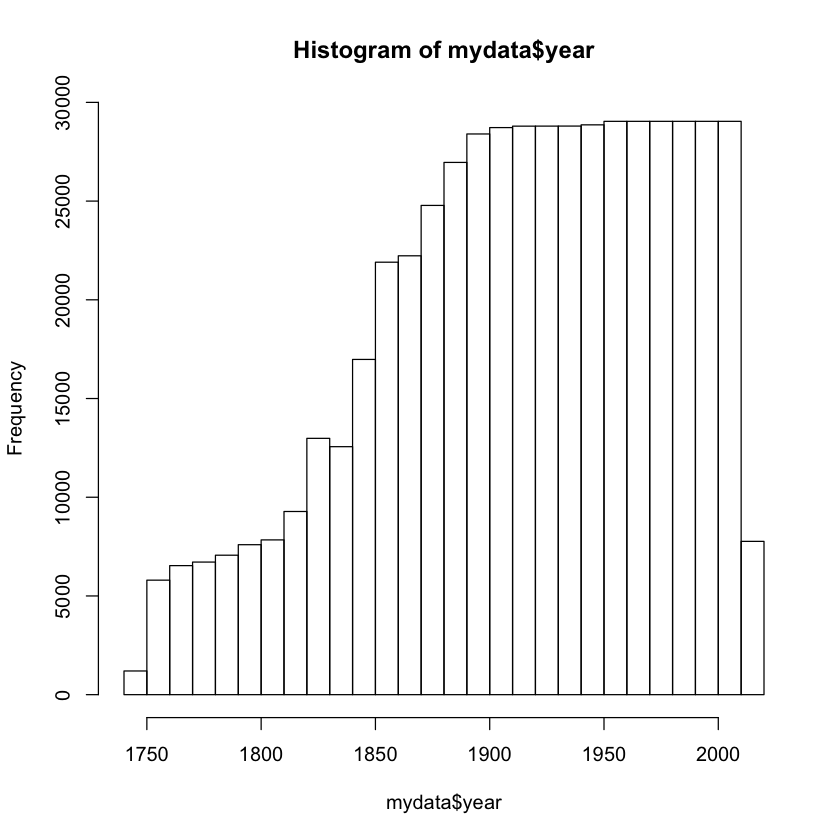

In [23]:
hist(mydata$year)

#### Create a histogram using gpplot 2

* ggplot(mydata, aes(x=year)) creates a plot using `mydata` aes defines the `x`, `y` and many other axis
* geom_histogram defines de plot as a histogram, `binwidth` defines de width of the bars
* scale_y_continuous(trans='log2') transforms the scale of the graph to `log2` delete `+ scale_y_continuous(trans='log2')` and check what happens
* theme_light() changes the theme. There are various themes like black and white or color blind. 
* labs(x="years", y="Frequency", face="bold") changes the `x` and `y` labels in the plot

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 34 rows containing missing values (geom_bar).”

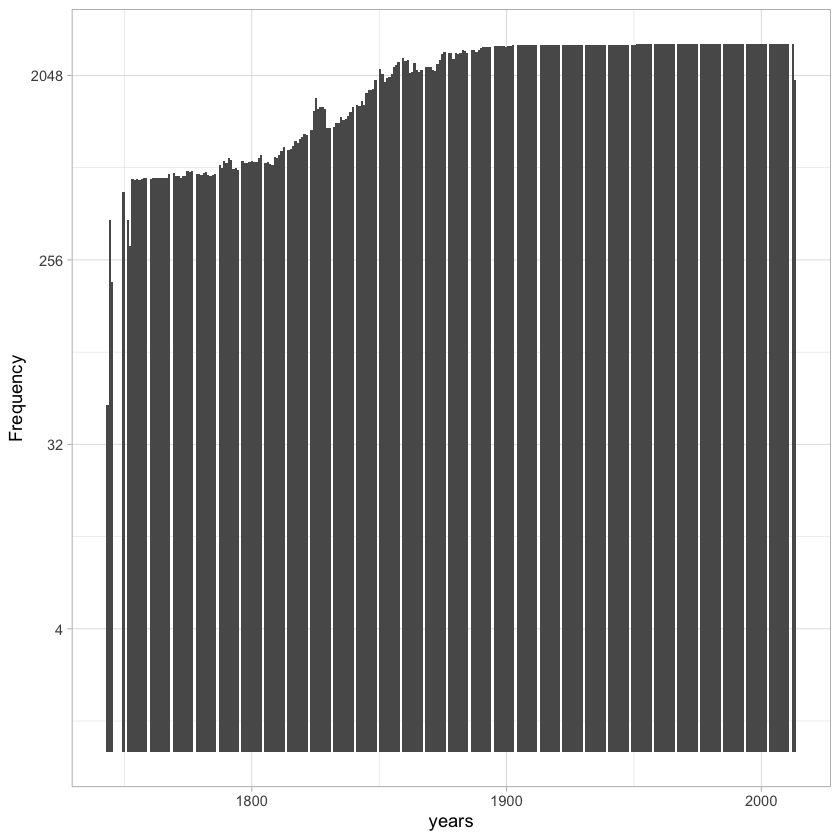

In [37]:
g <- ggplot(mydata, aes(x=year)) + geom_histogram(binwidth=.9) + scale_y_continuous(trans='log2')
g <- g + theme_light() + labs(x="years", y="Frequency", face="bold")
g

***

#### Create histogram for “Countries” 

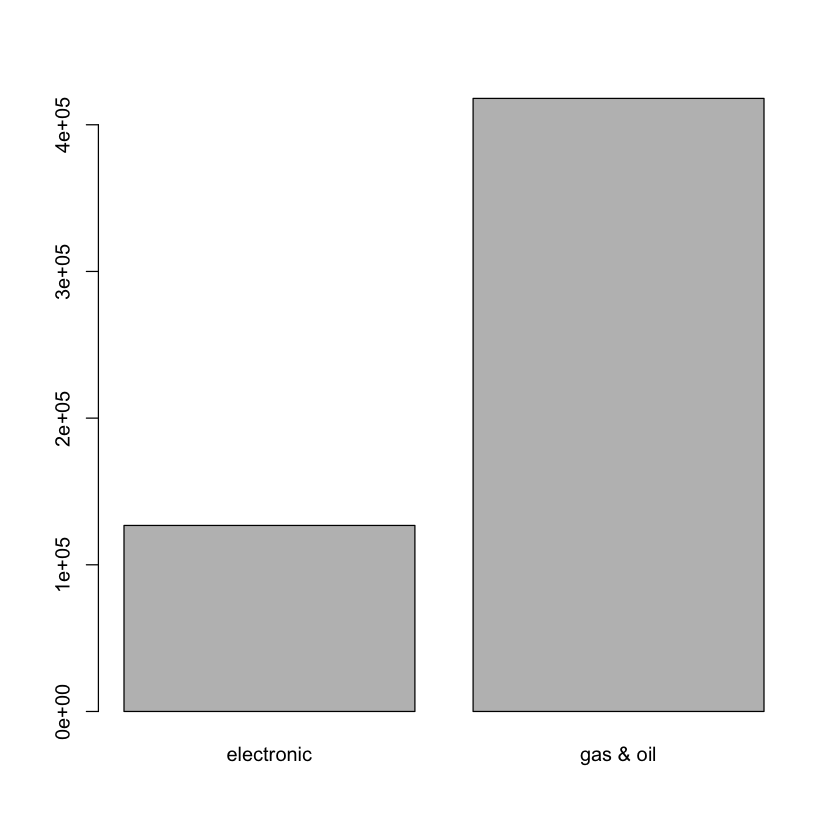

In [38]:
barplot(table(mydata$era))

***

### More visualization functions with “ggplot2”

Try to run this command:

```
ggplot(data=mydata, aes(x=year, y=AverageTemperature)) + geom_line()
```

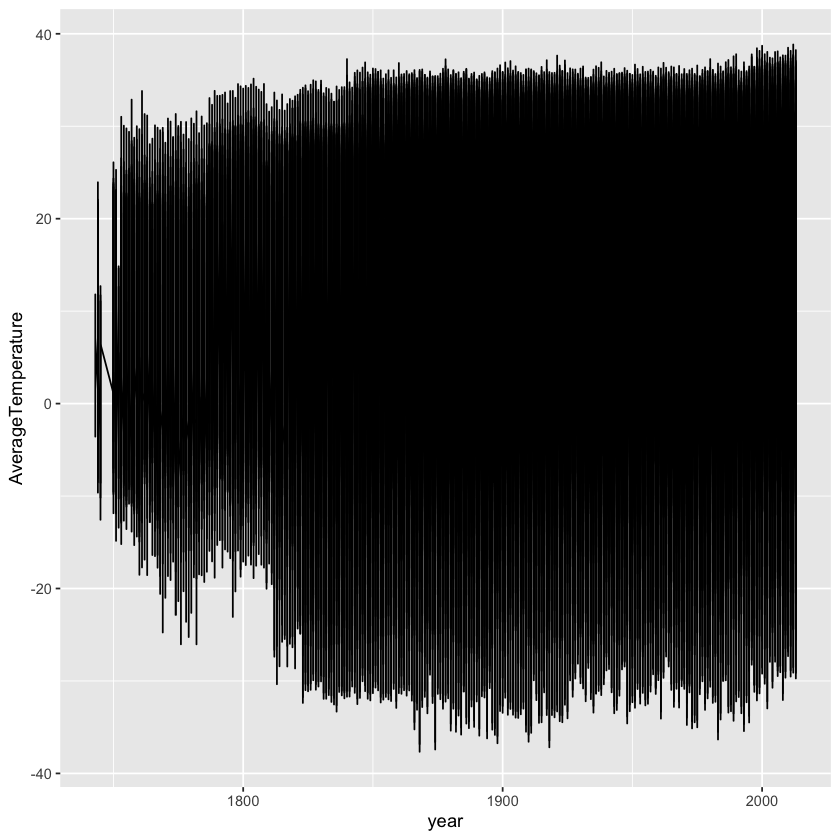

In [39]:
ggplot(data=mydata, aes(x=year, y=AverageTemperature)) + geom_line()

<img src="figures/staring.jpg">

### Can we do better? 

What if we can create smaller data with the year and the average temperature of that year?

In [40]:
grouped_data <- mydata  %>%
    group_by(year) %>%
    summarise(avg_temp = mean(AverageTemperature))

In [41]:
head(grouped_data)

year,avg_temp
1743,5.184140
1744,9.837898
1745,1.387125
1750,9.129353
1751,9.167388
1752,4.413387


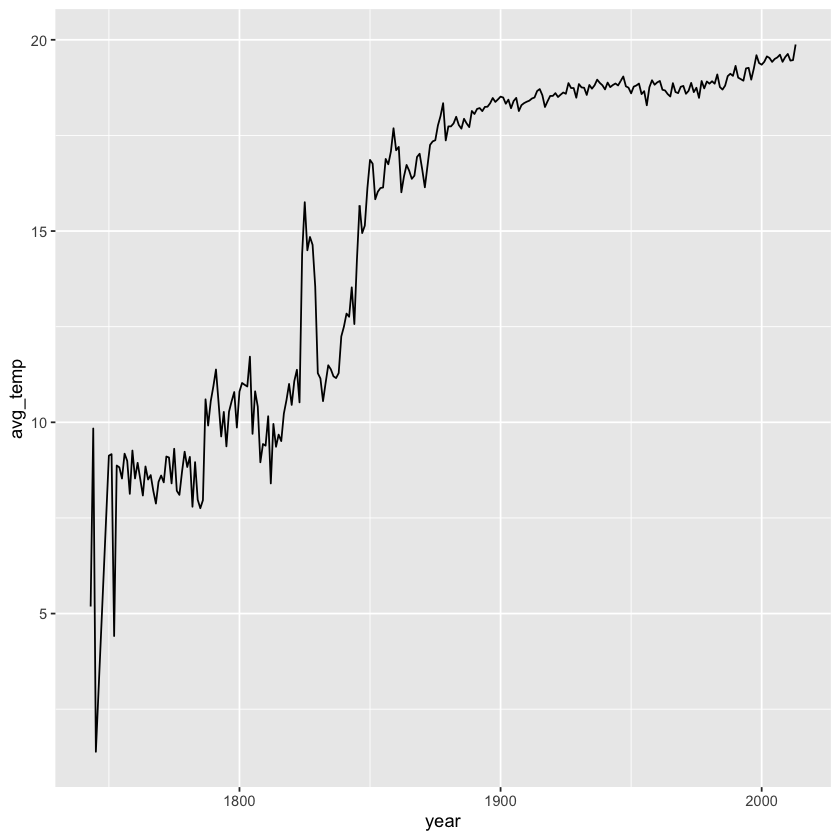

In [42]:
ggplot(data=grouped_data, aes(x=year, y=avg_temp)) +
  geom_line()

# Exercise

## If we are on track, try to:


### 1. load carbon dioxide data

### 2. remove NA

### 3. Change column "CarbonDioxide" to numeric

### 4. Change column "year" to numeric

### view the data using the head( )  and tail( ) commands


<br><br><br><br>


## Don't spoil the fun. The stick figure is watching you


<br><br><br><br>


<img src="figures/watch.png" width="30%">

### Answer:

In [44]:
carbon <- read.csv("CarbonDioxideEmission.csv")

In [45]:
carbon <- na.omit(carbon)

carbon$CarbonDioxide <- as.numeric(carbon$CarbonDioxide)
carbon$year <- as.numeric(carbon$year)

head(carbon)
tail(carbon)

,year,Month,DecimalDate,CarbonDioxide,SeasonallyAdjustedCO2,CarbonDioxideFit,SeasonallyAdjustedCO2Fit
3,1958,3,1958.203,315.69,314.42,316.18,314.89
4,1958,4,1958.288,317.45,315.15,317.30,314.98
5,1958,5,1958.370,317.50,314.73,317.83,315.06
7,1958,7,1958.537,315.86,315.17,315.87,315.21
8,1958,8,1958.622,314.93,316.17,314.01,315.29
9,1958,9,1958.707,313.21,316.06,312.48,315.35


,year,Month,DecimalDate,CarbonDioxide,SeasonallyAdjustedCO2,CarbonDioxideFit,SeasonallyAdjustedCO2Fit
704,2016,8,2016.623,402.24,403.78,403.02,404.60
705,2016,9,2016.708,401.01,404.52,401.33,404.85
706,2016,10,2016.790,401.50,405.12,401.48,405.09
707,2016,11,2016.874,403.64,405.92,403.08,405.34
708,2016,12,2016.956,404.55,405.49,404.66,405.58
709,2017,1,2017.041,406.07,406.04,405.87,405.83


# Inference Statistics

<img src="figures/learning_objectives.png">

## Some housekeeping and background

### Copy & run the code below 

In [46]:
carbon <- group_by(carbon, year) %>%
    summarise(AverageCarbonEmission = mean(CarbonDioxide))

newdata <- group_by(mydata, year, era) %>%
    summarise(AverageTemperature = mean(AverageTemperature))

carbon <- merge(newdata, carbon[, c("year", "AverageCarbonEmission")], by="year")
head(carbon)

year,era,AverageTemperature,AverageCarbonEmission
1958,gas & oil,18.94217,315.3300
1959,gas & oil,18.82521,315.9817
1960,gas & oil,18.88701,316.9083
1961,gas & oil,18.92357,317.6450
1962,gas & oil,18.69385,318.4533
1963,gas & oil,18.67525,318.9925


### You may want to review this code at home, but for now let's just consider that it merges two datasets

A detailed explanation for later reference explained line-by-line:

1. the `carbon` data will be updated with the result of the right-hand operation. The right-hand operation groups the dataset by year


2. after grouping, we apply the `summarise` to create a column named `carbon` the value of the column is the `mean` of the `CarbonDioxide` emission


3. we do a similar grouping operation creating a `newdata` data. 


4. this time, we are interested in the mean of the `AverageTemperature`


5. we now have two variables, one with the `year` and `AverageCarbonEmission` and another with year and `AverageTemperature`. Let's `merge` these two tables in a final `carbon` table. Our merging criteria is the `year` and we will copy two columns from the initial carbon table: `c("year", "AverageCarbonEmission")`

<br>

### Hypothesis testing

From [Wikipedia](https://en.wikipedia.org/wiki/Statistical_significance):

#### To determine whether a result is statistically significant, a researcher calculates a p-value, which is the probability of observing an effect of the same magnitude or more extreme given that the null hypothesis is true.

#### The null hypothesis is rejected if the p-value is less than a predetermined level, α.

#### α is called the significance level, and is the probability of rejecting the null hypothesis given that it is true (a type I error). 

#### α is usually set at or below 5%.

<img src="figures/normal_curve.png">

## Our null hypotheses

### There is no difference in the Average temperature in the `gas & oil` era and the `electronic` era

In [47]:
head(mydata)

dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,era
1743-11-01,4.384,2.294,Åland,1743,gas & oil
1744-04-01,1.530,4.680,Åland,1744,gas & oil
1744-05-01,6.702,1.789,Åland,1744,gas & oil
1744-06-01,11.609,1.577,Åland,1744,gas & oil
1744-07-01,15.342,1.410,Åland,1744,gas & oil
1744-09-01,11.702,1.517,Åland,1744,gas & oil


#### Independent T-test compares means between two groups

It is often used to see whether there is a group difference in continuous data **between two groups** 

*Model assumptions*

    (1) Independence

    (2) Normality

    (3) Equal variance

In [48]:
t.test(AverageTemperature ~ era, data=carbon, var.eq=TRUE)


	Two Sample t-test

data:  AverageTemperature by era
t = 3.7437, df = 54, p-value = 0.0004415
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1806106 0.5970976
sample estimates:
mean in group electronic  mean in group gas & oil 
                19.13249                 18.74364 


Interpreting the results:

* `t` value guides our analysis. Read more at this [link](https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions)
* `df = 54` degrees of freedom 
* `p-value < 0.0004415` pretty low, so that means that we can reject the null hypothesis

<br>

* Which one seems higher?
    * mean in group `gas & oil` = `18.74364`
    * mean in group `eletronics` = `19.13249`


### Is there any association between the `AverageTemperature` and the `AverageCarbonEmission`  ?

#### Pearson’s correlation is used to examine associations between variables (represented by continuous data) by looking at the direction and strength of the associations

In [49]:
cor.test(carbon$AverageTemperature, carbon$AverageCarbonEmission, method="pearson")


	Pearson's product-moment correlation

data:  carbon$AverageTemperature and carbon$AverageCarbonEmission
t = 14.919, df = 54, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8299122 0.9386169
sample estimates:
      cor 
0.8970832 


Interpreting the results:

* `p-value < 2.2e-16` pretty low, so that means that there is statistically significant correlation between `temperature` and `carbon emission`

<br>

* How strong is the correlation  `cor` = `0.8970832` 

    Interpretation varies by research field so results should be interpreted with caution
    
    `cor` varies from `-1` to `1` positive values indicate that an increase in the `x` variable increases the `y` variable. In this case, a value closer to `1` means a strong positive correlation


***

### Did we do the correct analysis?

### What if the data is not normally distributed?

#### Let us test for normality using the Shapiro-Wilk test:

**Null hypothesis**: The data is normally distributed. If p > 0.05, normality can be assumed.

In [50]:
shapiro.test(carbon$AverageTemperature)


	Shapiro-Wilk normality test

data:  carbon$AverageTemperature
W = 0.94052, p-value = 0.008176


* `p-value < 0.05` So we reject the null hypothesis and our data is skewed 

#### We can also check data visually 

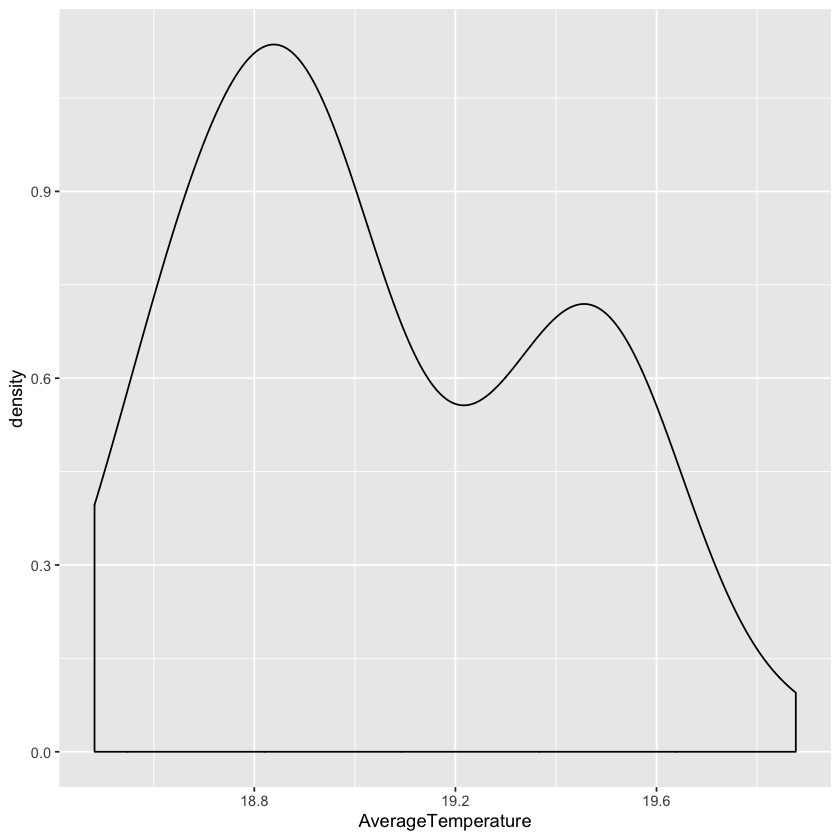

In [51]:
ggplot(carbon, aes(x=AverageTemperature)) + 
  geom_density()

***

### So what tests should we run?


Parametric test | R | Non-parametric test | R
--- | --- | --- | ---
Independent t-test | `t.test(y~x)` |  Mann-Whitney test | `wilcox.test(y~x)`
Paired t-test | `t.test(y1, y2, paired=TRUE)` | Wilcoxon signed rank test | `wilcox.test(y1,y2,paired=TRUE)`
One-way ANOVA | `aov(y ~ x, data = my_data)` |  Kruskal-Wallis test | `kruskal.test(y~x)`
Pearson's correlation | `cor.test(x, y, method=c("pearson")` | Spearman's correlation | `cor.test(x, y, method=c("spearman")`

These are only some examples

***

# Exercise

## If we are on track, try to:


### 1. Run the proper non-parametric tests for our data/analysis




<br><br><br><br>


## Don't spoil the fun. The stick figure is watching you


<br><br><br><br>


<img src="figures/watch.png" width="30%">

***

### Answer:



### Mann-Whitney test

In [52]:
wilcox.test(AverageTemperature ~ era, data=carbon)


	Wilcoxon rank sum test

data:  AverageTemperature by era
W = 437, p-value = 0.0002986
alternative hypothesis: true location shift is not equal to 0


***

### Spearman Correlation

In [53]:
cor.test(carbon$AverageTemperature, carbon$AverageCarbonEmission, method="spearman")


	Spearman's rank correlation rho

data:  carbon$AverageTemperature and carbon$AverageCarbonEmission
S = 4452, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8478469 


***

### Conclusions from our analysis

<img src="figures/this_is_fine.png">

***

# Research Commons: An interdisciplinary research-driven learning environment


### * Literature review
### * Systematic Review Search  Methodology
### * Citation Management
### * Thesis Formatting 


### * Nvivo Software Support



### * SPSS Software Support

<img style="float: right;" src="figures/research_commons_logo.png">


### * R Group



### * Multi-Disciplinary Graduate Student Writing Group

***

<img style="position: relative;" src="figures/background.png">

<img style="position: absolute; top: 50px; left: 200px; background: rgba(255,255,255, 0.5);" src="figures/thanks.png">



<center> <h1>Feedback</h1><h2>http://bit.ly/RCfeedbackwinter2018</h2> </center>
